In [1]:
from BFCalc.BFInterp import DM_spectrum_setup
from BFCalc.createspectragrids import singlechannel_diffflux, getspectrafunc
from utils import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy import units as u
from scipy import special,stats
from matplotlib import cm
from tqdm.autonotebook import tqdm as notebook_tqdm
import os, sys
import functools
from multiprocessing import Pool, freeze_support
import multiprocessing
sys.path.append("BFCalc")
from createspectragrids import twodinterpolationfunc


/Users/lpin0002/anaconda3/envs/please/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_82933/2473679168.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('cool')
/Users/lpin0002/Desktop/DMPipe/BFCalc/BFInterp.py:29: RuntimeWarning: divide by zero encountered in log
  return np.log(spectralfunc(10**logenerg))


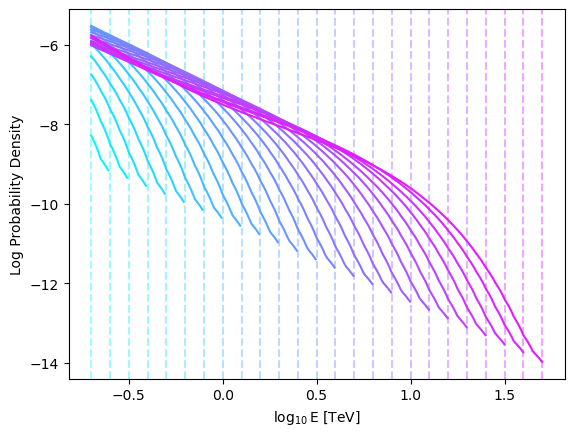

In [2]:
startlogmassval = log10eaxistrue[0]
endlogmassval = log10eaxistrue[-1]
examplelogmassvals = np.linspace(startlogmassval,endlogmassval,int((endlogmassval-startlogmassval)*10)+1)
colormap = cm.get_cmap('cool')

plt.figure()
for logmassval in examplelogmassvals:
    linecolor = colormap((logmassval+0.7)/2.7)
    plt.plot(log10eaxistrue, DM_spectrum_setup(logmassval, normeaxis=10**log10eaxistrue)(log10eaxistrue), c=linecolor)
    plt.axvline(logmassval, ls="--",alpha=0.4, c=linecolor)
plt.xlabel(r'$\log_{10}$E [TeV]')
plt.ylabel('Log Probability Density')
plt.show()

In [3]:
array1d = np.array([[1, 2, 3],
                    [4,5,6]])
array2d = np.array([[[0,1,2],
                     [-2,-1,0]],
                    
                    [[1,2,3],
                     [4,5,6]],
                    
                    [[-6,-5,-4],
                     [-3,-2,-1]]])

result = array2d + array1d[np.newaxis,:]
print(result.shape)
print(result)

(3, 2, 3)
[[[ 1  3  5]
  [ 2  4  6]]

 [[ 2  4  6]
  [ 8 10 12]]

 [[-5 -3 -1]
  [ 1  3  5]]]


In [4]:
energyarray1d = np.array([1, 2, 3])
offsetarray1d = np.array([0,1,2])

result = energyarray1d[np.newaxis,:]+offsetarray1d[:,np.newaxis] 
print(result.shape)
print(result)

(3, 3)
[[1 2 3]
 [2 3 4]
 [3 4 5]]


# Test and Setup

In [5]:
offsetvals = np.linspace(-3.5,3.5,8)
logevals = np.linspace(-1,2,31)
offsetvalsmesh, logevalsmesh = np.meshgrid(offsetaxis, log10eaxis)


colormap = cm.get_cmap('coolwarm')

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_82933/1171364216.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('coolwarm')


In [6]:
# edispmatrix = np.empty(shape=(log10eaxis.shape[0], log10eaxis.shape[0]))

# for ii, log10eval in notebook_tqdm(enumerate(log10eaxis), total=log10eaxis.shape[0]):
#     edispmatrix[ii,:] = edisp(log10eaxis, log10eval, 1.5)



In [7]:
# plt.figure()
# plt.pcolor(log10eaxis, log10eaxis, edispmatrix, vmin=np.max(edispmatrix)-5, vmax = np.max(edispmatrix))
# plt.colorbar()
# plt.show()

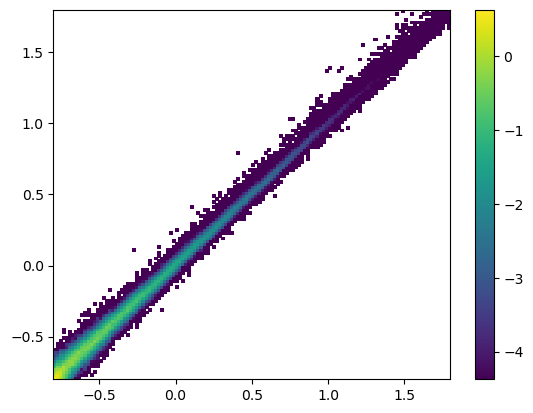

In [8]:
# psfmatrix = np.empty(shape=(offsetaxis.shape[0], offsetaxis.shape[0]))

# for ii, offsetval in notebook_tqdm(enumerate(offsetaxis), total=offsetaxis.shape[0]):
#     psfmatrix[ii,:] = psf(offsetaxis, offsetval, -0.9)

In [9]:
# plt.figure()
# plt.pcolor(offsetaxis, offsetaxis, psfmatrix)
# plt.show()

# Simulation

In [10]:
log10emesh, offsetmesh = np.meshgrid(log10eaxis, offsetaxis)
log10emeshtrue, offsetmeshtrue = np.meshgrid(log10eaxistrue, offsetaxistrue)

numberoftruevaluesamples = int(1e1)
Nsamples=numberoftruevaluesamples
truelambda = 0.5
nsig = int(round(truelambda*Nsamples))
nbkg = int(round((1-truelambda)*Nsamples))

truelogmassval = 1.0

In [11]:
sigpriorvalues = []
signaldistribution = setup_full_fake_signal_dist(truelogmassval, specsetup=DM_spectrum_setup, normeaxis=10**log10eaxis)

# for ii, logeval in enumerate(log10eaxistrue):
#     singlerow = signaldistribution(logeval, offsetaxistrue)
#     sigpriorvalues.append(singlerow)
# sigpriorvalues = np.array(sigpriorvalues)
# sigpriorvalues.shape
sigpriorvalues = np.squeeze(signaldistribution(log10emeshtrue, offsetmeshtrue).T)


In [12]:
# bkgpriorvalues = []

# for ii, logeval in notebook_tqdm(enumerate(log10eaxistrue), total=log10eaxistrue.shape[0]):
#     singlerow = []
#     # for ii, offsetval in enumerate(offsetaxis):
#     singlerow = bkgdist(logeval, offsetaxistrue)
#     bkgpriorvalues.append(singlerow)
bkgpriorvalues = np.squeeze(bkgdist(log10emeshtrue, offsetmeshtrue).T)

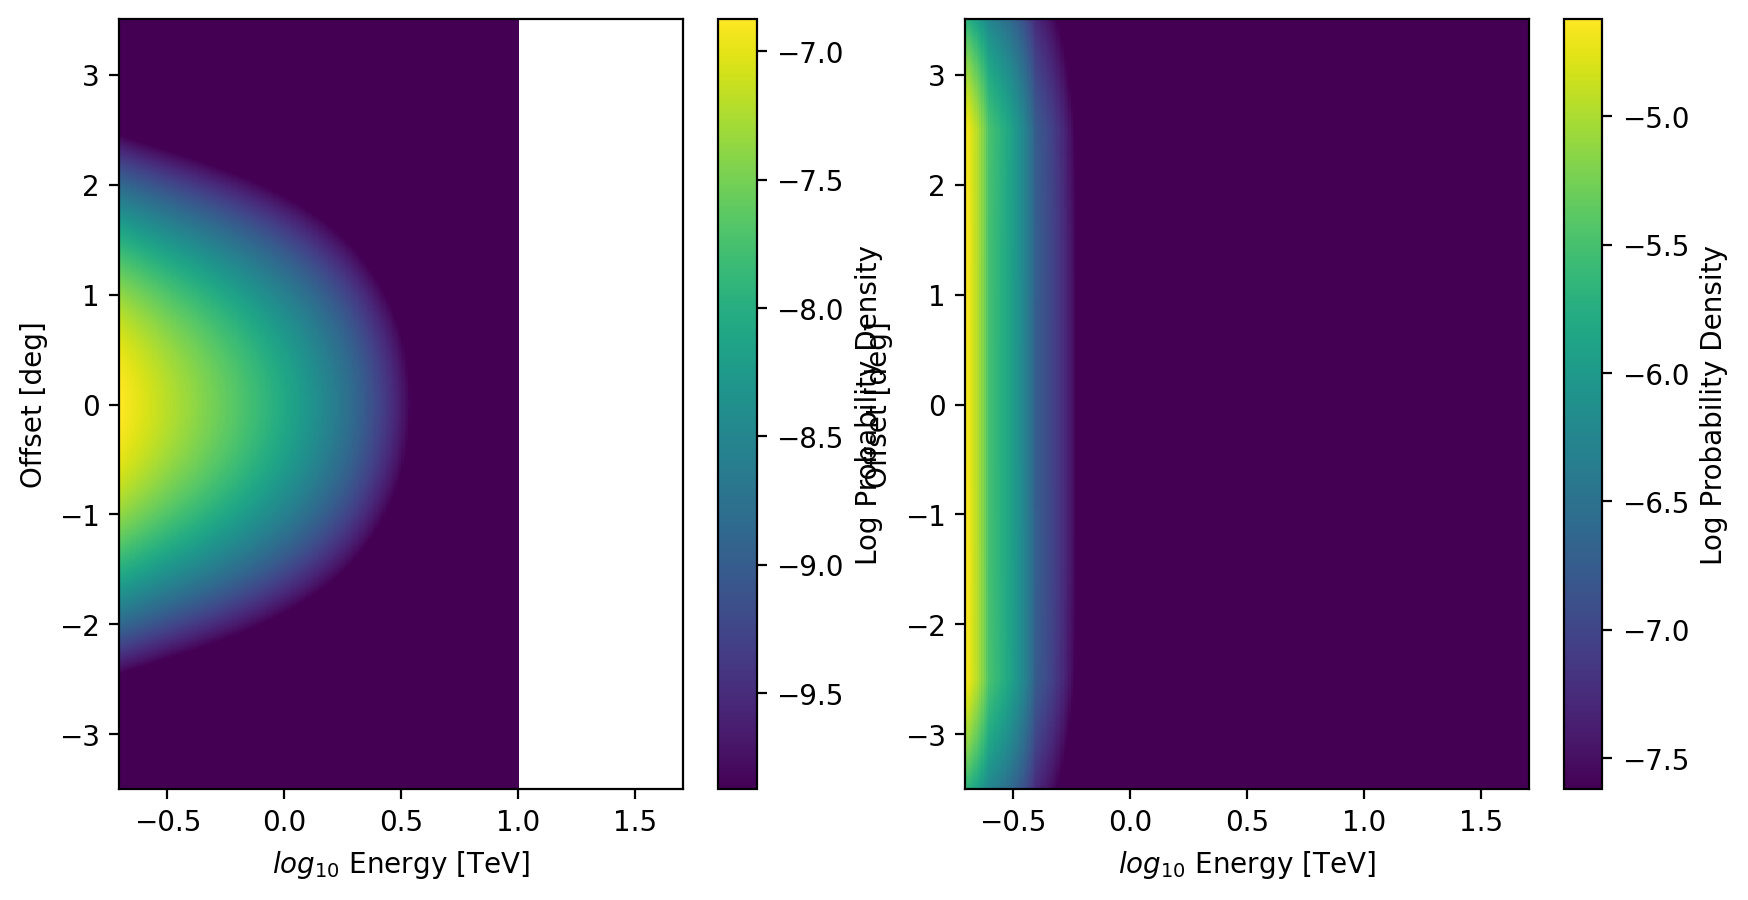

In [13]:
plt.figure(figsize=(10,5), dpi=200)
plt.subplot(1,2,1)
plt.pcolormesh(log10eaxistrue, offsetaxistrue, sigpriorvalues.T, vmin=np.max(sigpriorvalues)-3, vmax=np.max(sigpriorvalues))
plt.xlabel(r'$log_{10}$ Energy [TeV]')
plt.ylabel('Offset [deg]')
plt.colorbar(label='Log Probability Density')


plt.subplot(1,2,2)
plt.pcolormesh(log10eaxistrue, offsetaxistrue, bkgpriorvalues.T, vmin=np.max(bkgpriorvalues)-3, vmax=np.max(bkgpriorvalues))
plt.xlabel(r'$log_{10}$ Energy [TeV]')
plt.ylabel('Offset [deg]')
plt.colorbar(label='Log Probability Density')

In [14]:
sigbinnedprior = sigpriorvalues.T+logjacobtrue
flattened_sigbinnedprior = sigbinnedprior.flatten()


bkgbinnedprior = bkgpriorvalues.T+logjacobtrue
flattened_bkgbinnedprior = bkgbinnedprior.flatten()

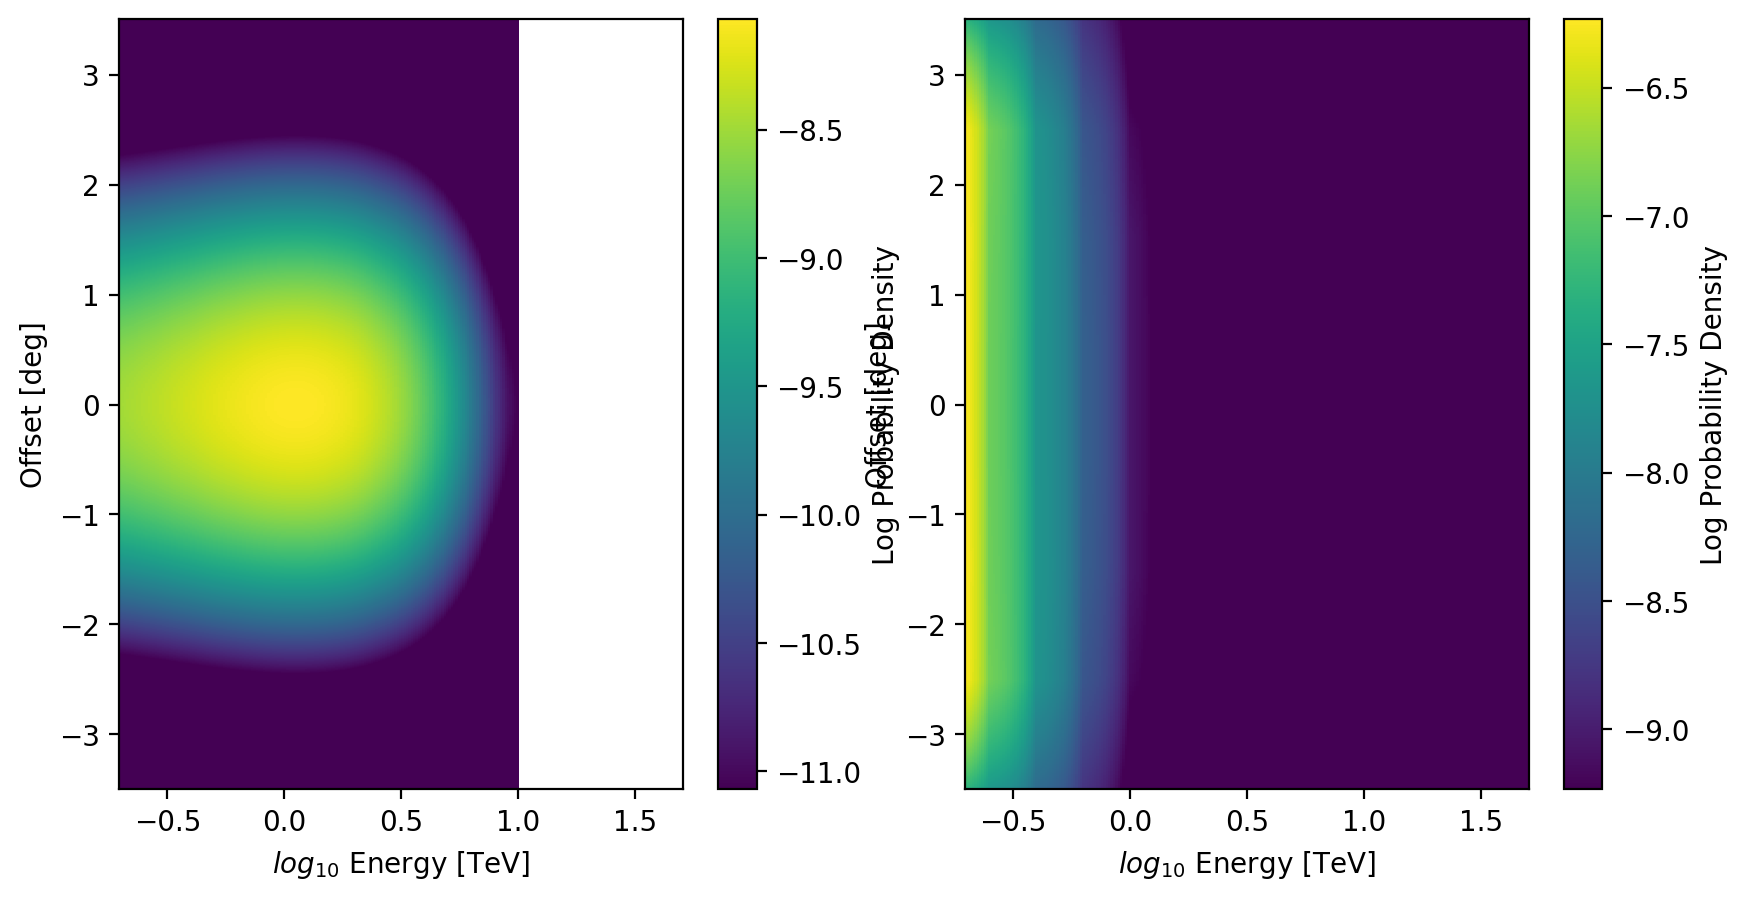

In [15]:
plt.figure(figsize=(10,5), dpi=200)
plt.subplot(1,2,1)
plt.pcolormesh(log10eaxistrue, offsetaxistrue, sigbinnedprior, vmin=np.max(sigbinnedprior)-3, vmax=np.max(sigbinnedprior))
plt.xlabel(r'$log_{10}$ Energy [TeV]')
plt.ylabel('Offset [deg]')
plt.colorbar(label='Log Probability Density')


plt.subplot(1,2,2)
plt.pcolormesh(log10eaxistrue, offsetaxistrue, bkgbinnedprior, vmin=np.max(bkgbinnedprior)-3, vmax=np.max(bkgbinnedprior))
plt.xlabel(r'$log_{10}$ Energy [TeV]')
plt.ylabel('Offset [deg]')
plt.colorbar(label='Log Probability Density')

## Checking prior normalisations

In [16]:
special.logsumexp(sigbinnedprior)

3.822399555069085

In [17]:
bkgnormalisation = special.logsumexp(bkgbinnedprior)

bkgbinnedprior = bkgbinnedprior - bkgnormalisation

bkgnormalisation

5.026094293906043

## Signal Simulation

In [18]:
sigresultindices = np.unravel_index(inverse_transform_sampling(flattened_sigbinnedprior, Nsamples=nsig),sigbinnedprior.shape)
siglogevals = log10eaxistrue[sigresultindices[1]]
sigoffsetvals = offsetaxistrue[sigresultindices[0]]

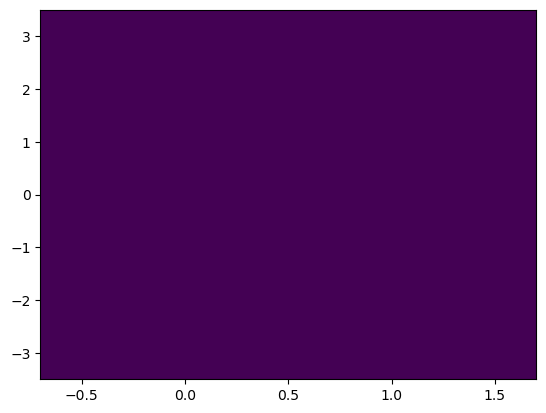

In [19]:
plt.figure()
plt.hist2d(siglogevals, sigoffsetvals, bins=[log10eaxistrue, offsetaxistrue+0.5*(offsetaxistrue[1]-offsetaxistrue[0])])
# for val in offsetaxis+0.5*(offsetaxis[1]-offsetaxis[0]):
#     plt.axhline(val, alpha=0.1, c='tab:orange')
plt.show()

In [20]:
signal_log10e_measured = log10eaxis[np.squeeze([inverse_transform_sampling(edisp(log10eaxis, logeval, offsetval)+logjacob, Nsamples=1) for logeval, offsetval in notebook_tqdm(zip(siglogevals, sigoffsetvals), total=nsig)])]

  0%|          | 0/5 [00:00<?, ?it/s]/Users/lpin0002/Desktop/DMPipe/utils.py:53: RuntimeWarning: divide by zero encountered in log
  return np.log(edispfull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
100%|██████████| 5/5 [00:00<00:00, 619.80it/s]


In [21]:
signal_offset_measured = offsetaxis[np.squeeze([inverse_transform_sampling(psf(offsetaxis, offsetval, logeval), Nsamples=1) for logeval, offsetval in notebook_tqdm(zip(siglogevals, sigoffsetvals), total=nsig)])]


  0%|          | 0/5 [00:00<?, ?it/s]/Users/lpin0002/Desktop/DMPipe/utils.py:71: RuntimeWarning: divide by zero encountered in log
  return np.log(psffull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
100%|██████████| 5/5 [00:00<00:00, 122.53it/s]


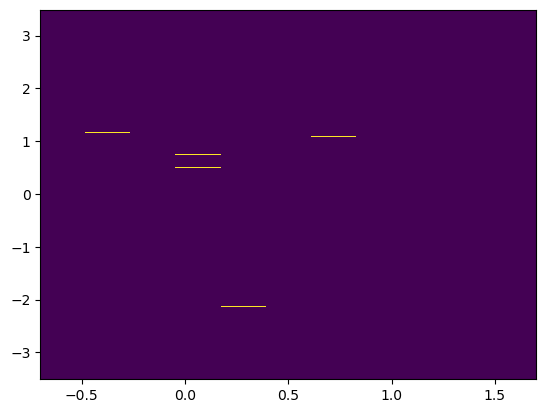

5.0

In [22]:
plt.figure()
histvals = plt.hist2d(signal_log10e_measured, signal_offset_measured, bins=[log10eaxis, offsetaxis-0.5*(offsetaxis[1]-offsetaxis[0])])
plt.show()

np.sum(histvals[0])

## Background Simulations

In [23]:
bkgresultindices = np.unravel_index(inverse_transform_sampling(flattened_bkgbinnedprior, Nsamples=nbkg),sigbinnedprior.shape)
bkglogevals = log10eaxistrue[bkgresultindices[1]]
bkgoffsetvals = offsetaxistrue[bkgresultindices[0]]

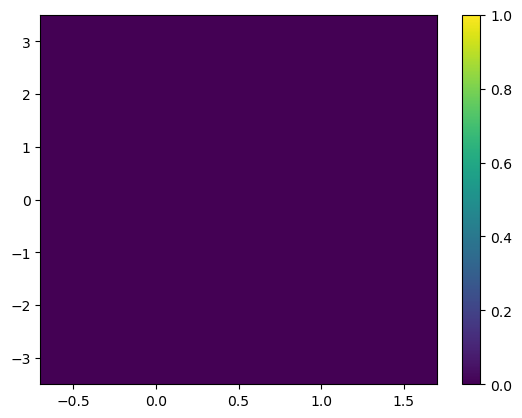

In [24]:
plt.figure()
plt.hist2d(bkglogevals, bkgoffsetvals, bins=[log10eaxistrue, offsetaxistrue+0.5*(offsetaxistrue[1]-offsetaxistrue[0])])
plt.colorbar()
plt.show()

In [25]:
bkg_log10e_measured = log10eaxis[np.squeeze([inverse_transform_sampling(edisp(log10eaxis, logeval, offsetval)+logjacob, Nsamples=1) for logeval, offsetval in notebook_tqdm(zip(bkglogevals, bkgoffsetvals), total=nbkg)])]

100%|██████████| 5/5 [00:00<00:00, 1226.69it/s]


In [26]:
bkg_offset_measured = offsetaxis[np.squeeze([inverse_transform_sampling(psf(offsetaxis, offsetval, logeval), Nsamples=1) for logeval, offsetval in notebook_tqdm(zip(bkglogevals, bkgoffsetvals), total=nbkg)])]


100%|██████████| 5/5 [00:00<00:00, 137.94it/s]


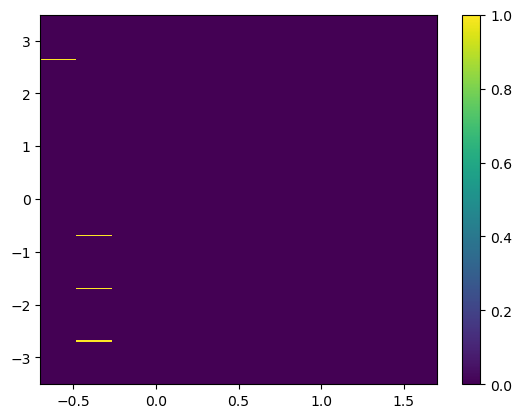

5.0

In [27]:
plt.figure()
histvals = plt.hist2d(bkg_log10e_measured, bkg_offset_measured, bins=[log10eaxis, offsetaxis-0.5*(offsetaxis[1]-offsetaxis[0])])
plt.colorbar()
plt.show()

np.sum(histvals[0])

# Nuisance Parameter Marginalisation

## Setup

Hello

In [28]:
sigdistsetup = setup_full_fake_signal_dist
# Makes it so that when np.log(0) is called a warning isn't raised as well as other errors stemming from this.
np.seterr(divide='ignore', invalid='ignore')


true_offset_vals             = np.array(list(sigoffsetvals)+list(bkgoffsetvals))
measured_offset_vals         = np.array(list(signal_offset_measured)+list(bkg_offset_measured))
true_log10e_vals             = np.array(list(siglogevals)+list(bkglogevals))
measured_log10e_vals         = np.array(list(signal_log10e_measured)+list(bkg_log10e_measured))

numcores                = 10


nbinslogmass            = 101
logmasswindowwidth      = 2/np.sqrt(nsig)

nbinslambda             = 101
lambdawindowwidth       = 3/np.sqrt(Nsamples)


logmasslowerbound       = truelogmassval-logmasswindowwidth
logmassupperbound       = truelogmassval+logmasswindowwidth


lambdalowerbound        = truelambda-lambdawindowwidth
lambdaupperbound        = truelambda+lambdawindowwidth


if logmasslowerbound<log10eaxis[1]:
    logmasslowerbound = log10eaxis[1]
if logmassupperbound>2:
    logmassupperbound = 2
        
        
if lambdalowerbound<0:
    lambdalowerbound = 0
if lambdaupperbound>1:
    lambdaupperbound = 1


logmassrange            = np.linspace(logmasslowerbound, logmassupperbound, nbinslogmass)    
lambdarange             = np.linspace(lambdalowerbound, lambdaupperbound, nbinslambda)

## Calculating IRF probability densities

In [29]:
testvalue = calcirfvals([measured_log10e_vals[0], measured_offset_vals[0]])
print(testvalue)
irfvals = []
with Pool(numcores) as pool: 
        for result in notebook_tqdm(pool.imap(calcirfvals, zip(measured_log10e_vals, measured_offset_vals)), 
                            total=len(list(measured_log10e_vals)), ncols=100, desc="Calculating irfvals"):
                irfvals.append(result)

        pool.close() 

[[         -inf          -inf          -inf ...          -inf
           -inf          -inf]
 [         -inf          -inf          -inf ...          -inf
           -inf          -inf]
 [         -inf          -inf          -inf ...          -inf
           -inf          -inf]
 ...
 [-453.27500005 -471.60013685 -478.83751989 ...          -inf
           -inf          -inf]
 [-453.85736217 -472.19885644 -479.45420388 ...          -inf
           -inf          -inf]
 [-453.87785539 -472.20707092 -479.44904849 ...          -inf
           -inf          -inf]]


Calculating irfvals:   0%|                                                   | 0/10 [00:00<?, ?it/s]/Users/lpin0002/Desktop/DMPipe/utils.py:53: RuntimeWarning: divide by zero encountered in log
  return np.log(edispfull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:53: RuntimeWarning: divide by zero encountered in log
  return np.log(edispfull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:53: RuntimeWarning: divide by zero encountered in log
  return np.log(edispfull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:53: RuntimeWarning: divide by zero encountered in log
  return np.log(edispfull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:53: RuntimeWarning: divide by zero encountered in log
  return np.log(edispfull.evaluate(energy_true=np.power(10.,logetrue)*u.TeV,
/Users/lpin0002/Desktop/DMPipe/utils.py:53: R

## Signal Marginalisations

In [30]:
testevaluateformass = evaluateformass(truelogmassval, irfvals=irfvals[0], specsetup=DM_spectrum_setup)


produce_logsigmarg_function = functools.partial(evaluateformass, irfvals=irfvals, specsetup=DM_spectrum_setup)
signal_log_marginalisationvalues = []
with Pool(numcores) as pool: 
        
        for result in notebook_tqdm(pool.imap(produce_logsigmarg_function, logmassrange), total=len(list(logmassrange)), ncols=100, desc="Calculating signal marginalisations..."):
                signal_log_marginalisationvalues.append(result)

        pool.close() 
signal_log_marginalisationvalues = np.array(signal_log_marginalisationvalues)
signal_log_marginalisationvalues.shape

Calculating signal marginalisations...:   0%|                               | 0/101 [00:00<?, ?it/s]/Users/lpin0002/Desktop/DMPipe/BFCalc/BFInterp.py:29: RuntimeWarning: divide by zero encountered in log
  return np.log(spectralfunc(10**logenerg))
Calculating signal marginalisations...:   1%|▏                      | 1/101 [00:11<19:37, 11.77s/it]/Users/lpin0002/Desktop/DMPipe/BFCalc/BFInterp.py:29: RuntimeWarning: divide by zero encountered in log
  return np.log(spectralfunc(10**logenerg))
/Users/lpin0002/Desktop/DMPipe/BFCalc/BFInterp.py:29: RuntimeWarning: divide by zero encountered in log
  return np.log(spectralfunc(10**logenerg))
Calculating signal marginalisations...:   3%|▋                      | 3/101 [00:13<05:02,  3.08s/it]/Users/lpin0002/Desktop/DMPipe/BFCalc/BFInterp.py:29: RuntimeWarning: divide by zero encountered in log
  return np.log(spectralfunc(10**logenerg))
Calculating signal marginalisations...:   4%|▉                      | 4/101 [00:13<03:19,  2.06s/it]/Users/l

(101, 10)

## Background Marginalisations

In [31]:
produce_logbkgmarg_function = functools.partial(evaluateintegral, priorvals=bkgpriorvalues.T-bkgnormalisation)

bkg_log_marginalisationvalues = []
with Pool(numcores) as pool: 
        for result in notebook_tqdm(pool.imap(produce_logbkgmarg_function, irfvals), total=len(list(irfvals)), ncols=100, desc="Calculating background marginalisations..."):
                bkg_log_marginalisationvalues.append(result)

        pool.close() 
bkg_log_marginalisationvalues = np.array(bkg_log_marginalisationvalues)
bkg_log_marginalisationvalues.shape

Calculating background marginalisations...: 100%|███████████████████| 10/10 [00:13<00:00,  1.39s/it]


(10,)

# Calculating hyperparameter posterior

In [32]:
logposterior = []

for ii, logmass in notebook_tqdm(enumerate(logmassrange), total=len(list(logmassrange))):
    singlerow = []
    for jj, lambdaval in enumerate(lambdarange):
        product = np.sum(np.logaddexp(np.log(lambdaval)+signal_log_marginalisationvalues[ii,:], np.log(1-lambdaval)+bkg_log_marginalisationvalues))
        singlerow.append(product)
    logposterior.append(singlerow)
logposterior = np.array(logposterior)

normalisedlogposterior = logposterior-special.logsumexp(logposterior)

  0%|          | 0/101 [00:00<?, ?it/s]

100%|██████████| 101/101 [00:00<00:00, 506.85it/s]


# Analysing results

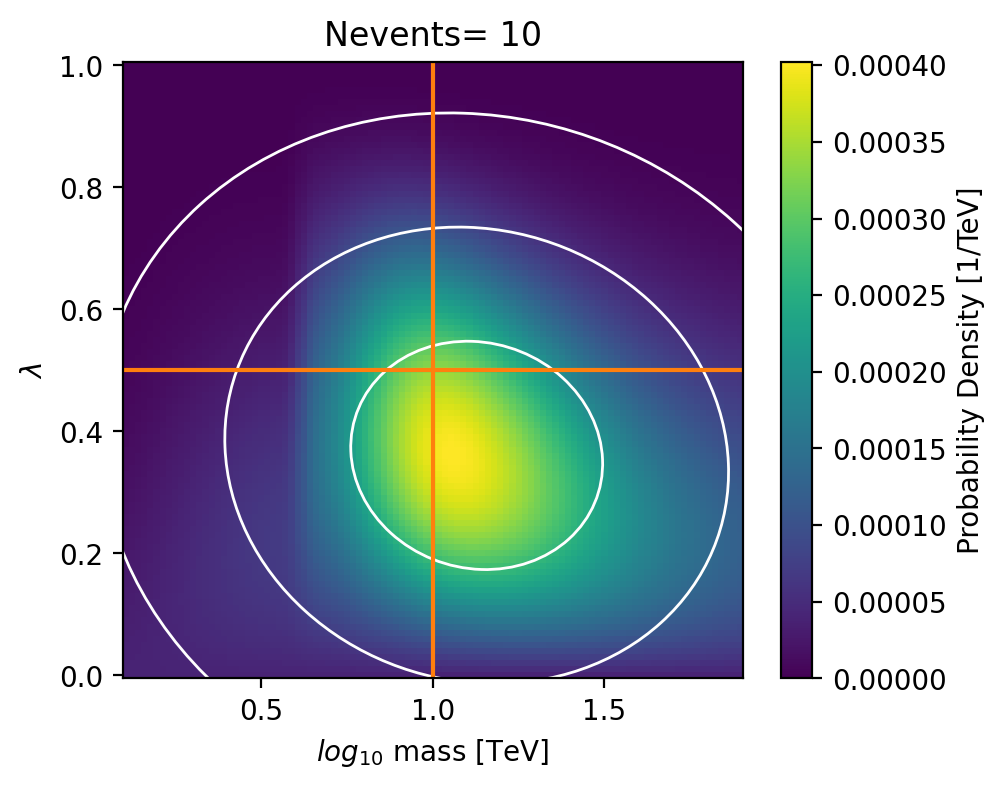

In [33]:
from utils import confidence_ellipse


fig, ax = plt.subplots(dpi=200, figsize=(5,4))
plt.pcolormesh(logmassrange, lambdarange, np.exp(normalisedlogposterior).T)
plt.axvline(truelogmassval, c='tab:orange')
plt.axhline(truelambda, c='tab:orange')
plt.title(f"Nevents= {Nsamples}")
plt.xlabel(r'$log_{10}$ mass [TeV]')
plt.ylabel(r'$\lambda$')

confidence_ellipse(logmassrange, lambdarange, np.exp(normalisedlogposterior).T, ax, n_std=1.0)
confidence_ellipse(logmassrange, lambdarange, np.exp(normalisedlogposterior).T, ax, n_std=2.0)
confidence_ellipse(logmassrange, lambdarange, np.exp(normalisedlogposterior).T, ax, n_std=3.0)

plt.colorbar(label='Probability Density [1/TeV]')
# plt.savefig('Figures/thousandevent_firstsuccesful2drun_hyperparameterposterior.pdf')
plt.show()

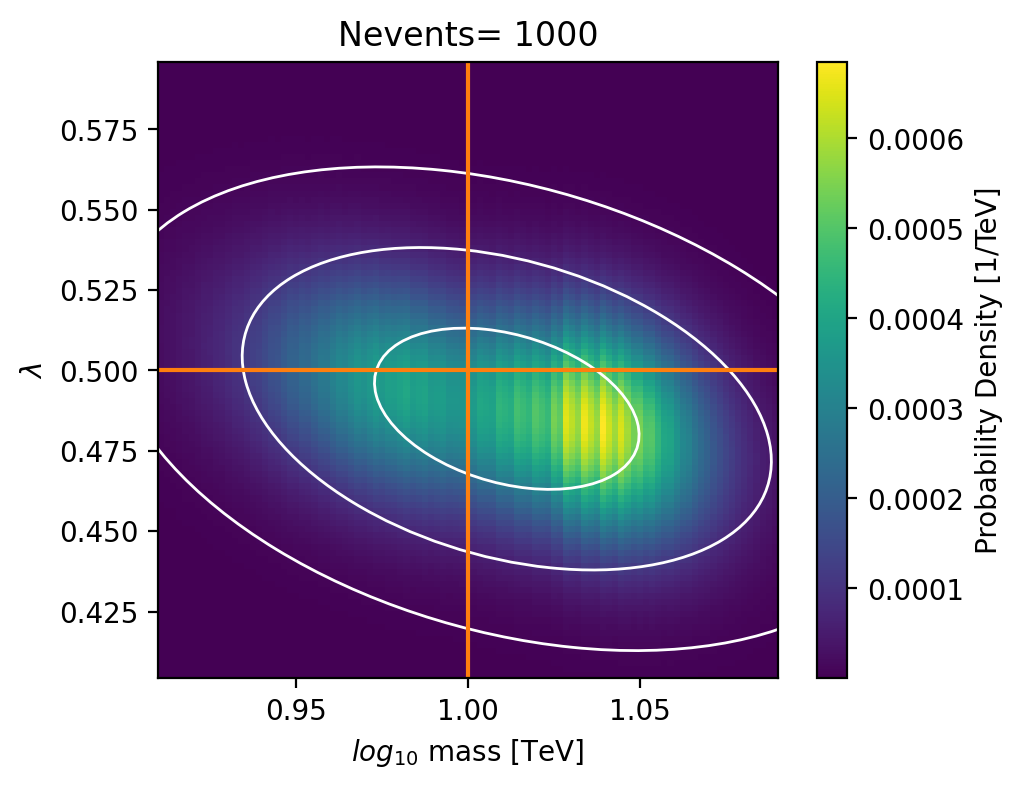

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_82933/3387926316.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('Blues_r', 4)


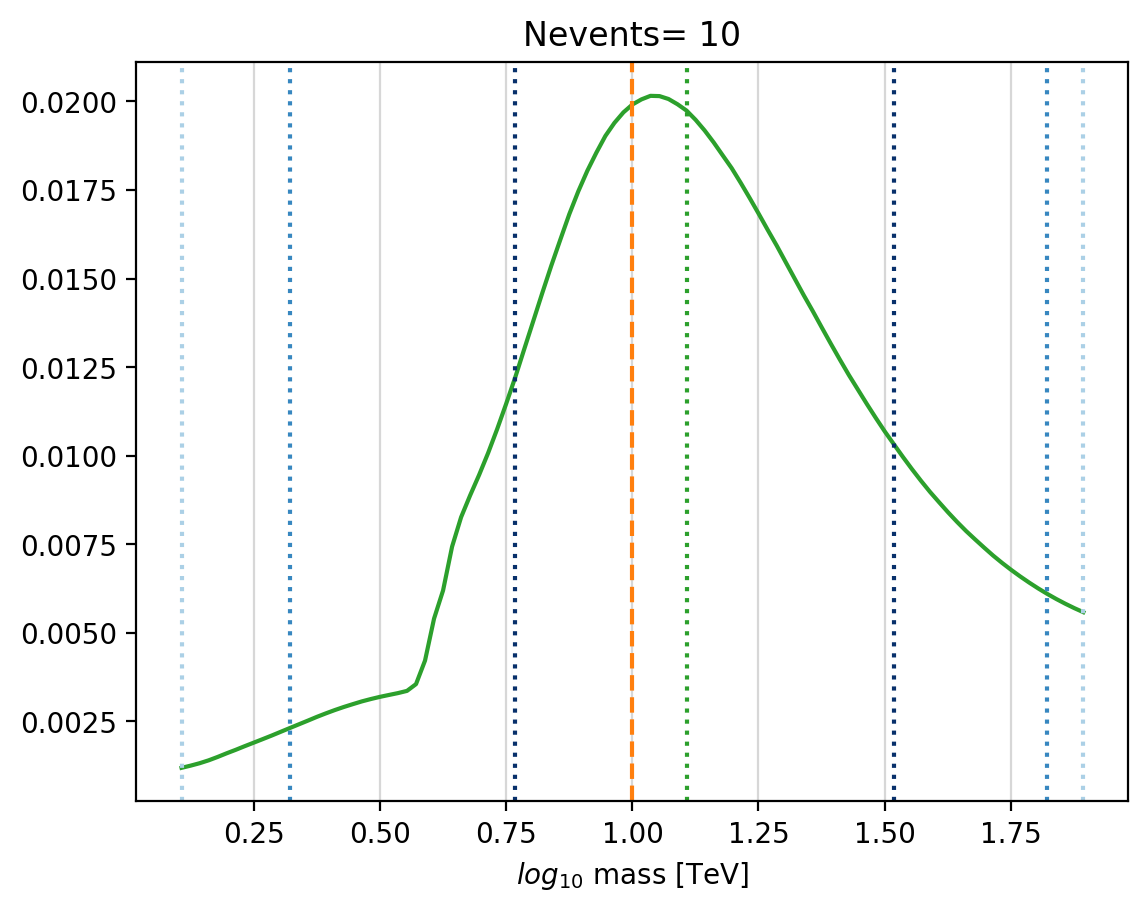

In [34]:
from scipy.stats import norm

colormap = cm.get_cmap('Blues_r', 4)

logmass_logposterior = special.logsumexp(normalisedlogposterior, axis=1)
logmass_logposterior.shape

normalisedlogmassposterior = np.exp(logmass_logposterior-special.logsumexp(logmass_logposterior))

cdfposterior = np.cumsum(normalisedlogmassposterior)
mean = logmassrange[np.abs(norm.cdf(0)-cdfposterior).argmin()]
zscores = [-3, -2,-1,1,2, 3]
percentiles = []
for zscore in zscores:
    percentiles.append(logmassrange[np.abs(norm.cdf(zscore)-cdfposterior).argmin()])

plt.figure(dpi=200)
plt.title(f"Nevents= {Nsamples}")
plt.plot(logmassrange,normalisedlogmassposterior, c='tab:green')

plt.axvline(mean, c='tab:green', ls=':')


for o, percentile in enumerate(percentiles):
            color = colormap(np.abs(zscores[o])/4-0.01)

            plt.axvline(percentile, c=color, ls=':')
plt.axvline(truelogmassval, ls='--', color="tab:orange")
plt.xlabel(r'$log_{10}$ mass [TeV]')
plt.grid(axis='x', markevery=log10eaxis, alpha=0.5)
# plt.savefig('Figures/thousandevent_firstsuccesful2drun_logmassposterior.pdf')

plt.show()

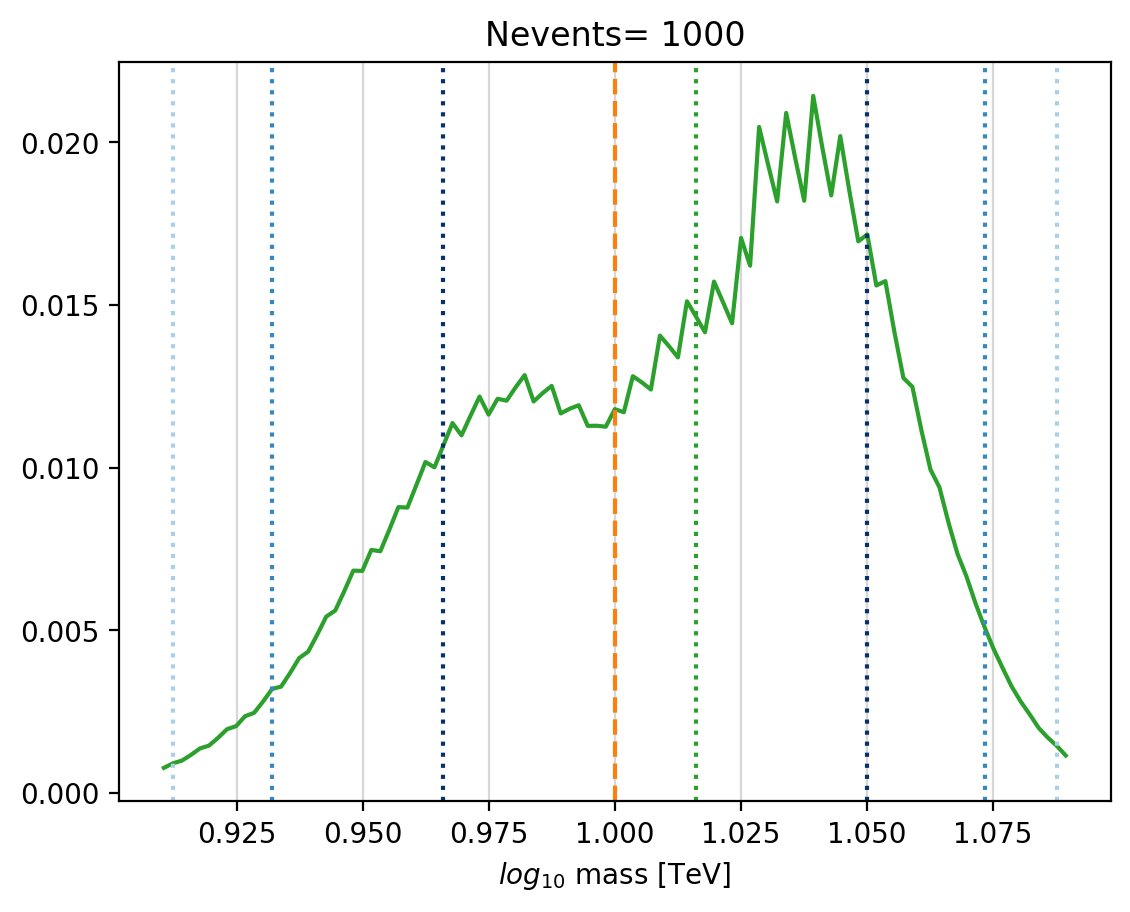

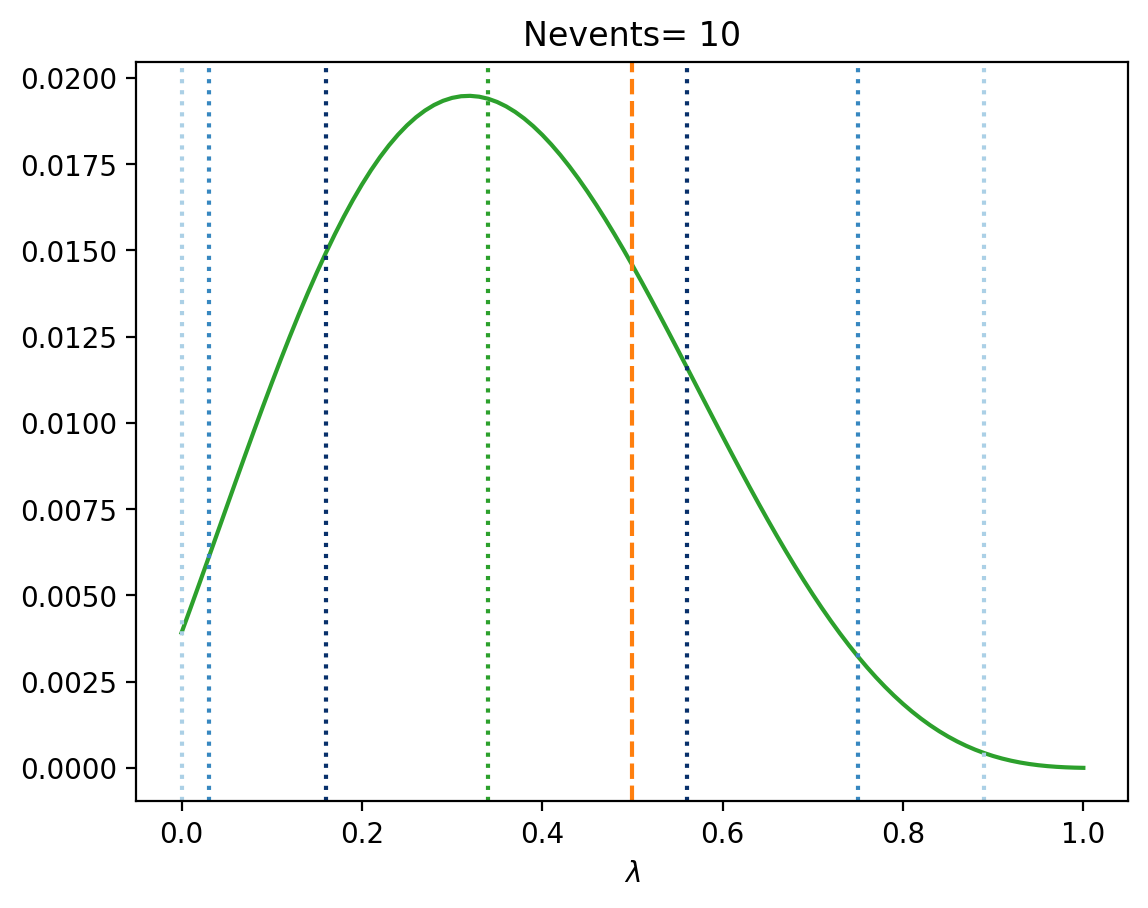

In [35]:
lambda_logposterior = special.logsumexp(normalisedlogposterior, axis=0)

normalisedlambdaposterior = np.exp(lambda_logposterior-special.logsumexp(lambda_logposterior))

cdflambdaposterior = np.cumsum(normalisedlambdaposterior)
meanlabda = lambdarange[np.abs(norm.cdf(0)-cdflambdaposterior).argmin()]
lambdapercentiles = []
for zscore in zscores:
    lambdapercentiles.append(lambdarange[np.abs(norm.cdf(zscore)-cdflambdaposterior).argmin()])

plt.figure(dpi=200)
plt.title(f"Nevents= {Nsamples}")
plt.plot(lambdarange,normalisedlambdaposterior, c='tab:green')

plt.axvline(meanlabda, c='tab:green', ls=':')


for o, percentile in enumerate(lambdapercentiles):
            color = colormap(np.abs(zscores[o])/4-0.01)

            plt.axvline(percentile, c=color, ls=':')
plt.axvline(truelambda, ls='--', color="tab:orange")
plt.xlabel(r'$\lambda$')
# plt.savefig('Figures/thousandevent_firstsuccesful2drun_lambdaposterior.pdf')

plt.show()

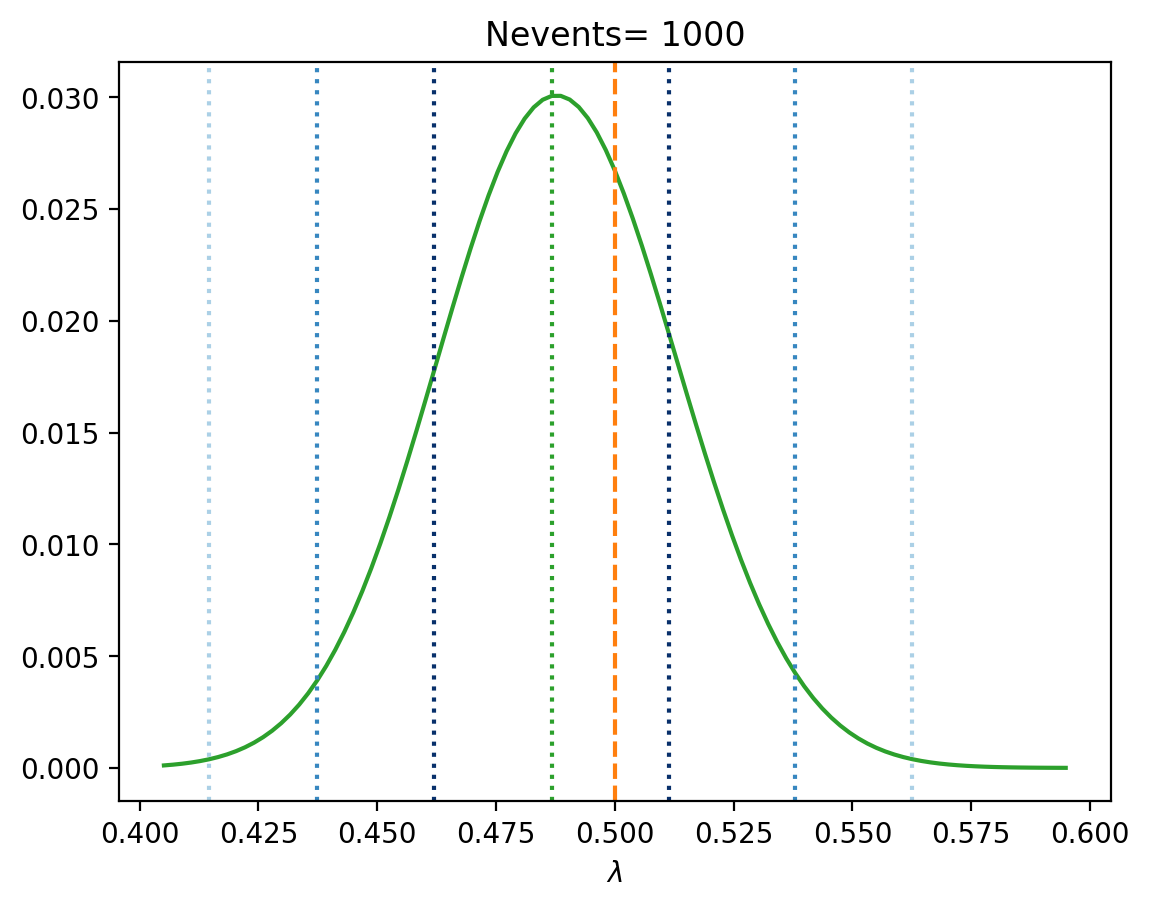

## Brute Force Version

In [36]:
from brutesampler import brutedynesty

In [37]:
samplerresults = brutedynesty(DM_spectrum_setup, bkgdist, irfvals)

/Users/lpin0002/Desktop/DMPipe/BFCalc/BFInterp.py:29: RuntimeWarning: divide by zero encountered in log
  return np.log(spectralfunc(10**logenerg))
/Users/lpin0002/Desktop/DMPipe/BFCalc/BFInterp.py:29: RuntimeWarning: divide by zero encountered in log
  return np.log(spectralfunc(10**logenerg))
/Users/lpin0002/Desktop/DMPipe/BFCalc/BFInterp.py:29: RuntimeWarning: divide by zero encountered in log
  return np.log(spectralfunc(10**logenerg))
/Users/lpin0002/Desktop/DMPipe/BFCalc/BFInterp.py:29: RuntimeWarning: divide by zero encountered in log
  return np.log(spectralfunc(10**logenerg))
/Users/lpin0002/Desktop/DMPipe/BFCalc/BFInterp.py:29: RuntimeWarning: divide by zero encountered in log
  return np.log(spectralfunc(10**logenerg))
/Users/lpin0002/Desktop/DMPipe/BFCalc/BFInterp.py:29: RuntimeWarning: divide by zero encountered in log
  return np.log(spectralfunc(10**logenerg))
/Users/lpin0002/Desktop/DMPipe/BFCalc/BFInterp.py:29: RuntimeWarning: divide by zero encountered in log
  return

/Users/lpin0002/anaconda3/envs/please/lib/python3.9/site-packages/fontTools/misc/py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(


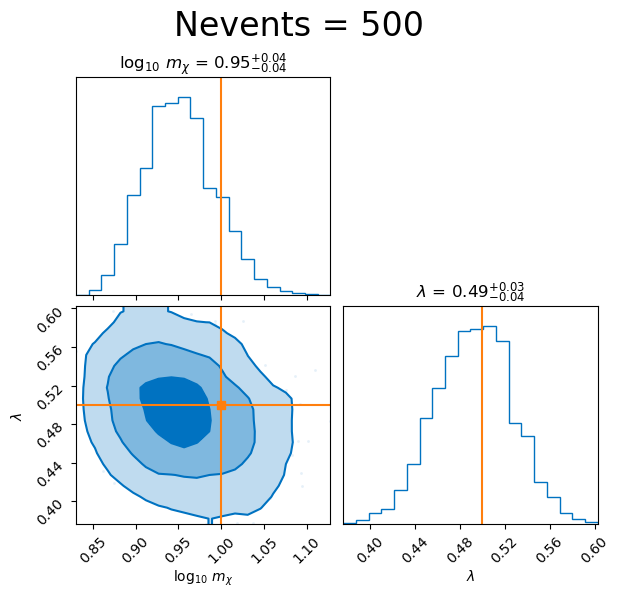

In [ ]:

from corner import corner
from time import strftime

figure = corner(
                samplerresults.samples_equal(),
                levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                labels=[r"log$_{10}$ $m_\chi$", r"$\lambda$"],
                show_titles=True,
                title_kwargs={"fontsize": 12},
                bins = [20,20],
                truths=[truelogmassval, truelambda],
                labelpad=-0.1,
                tick_kwargs={'rotation':90},
                color='#0072C1',
                truth_color='tab:orange',
                plot_density=0, 
                plot_datapoints=True, 
                fill_contours=True,
                max_n_ticks=7,
                hist_kwargs=dict(density=True),
                smooth=0.9,
    )
figure.set_size_inches(7,6)
figure.set_dpi(100)
plt.suptitle(f'Nevents = {Nsamples}', y=1.04, size=24)
plt.savefig(strftime(f'Figures/bruteforce_2d_{truelogmassval}_{truelambda}_{Nsamples}_%m%d_%H%M.pdf'))
plt.savefig(strftime(f'Figures/bruteforce_2d_{truelogmassval}_{truelambda}_{Nsamples}_%m%d_%H%M.png'))
plt.show()